<a href="https://colab.research.google.com/github/lauratcc18/IAMINTIC/blob/main/4_RFE_selecci%C3%B3n_de_caract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Selección de Características
## Método wrapper RFE - Recursive Feature Elimination
Usaremos el dataset de Diabetes de que busca predecir a partir de 8 variables de diagnóstico, si un paciente tiene diabetes.

En este caso usaremos un dataset pre-procesado en el que se ha hecho tratamiento para missing values, tomado de https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

In [ ]:
from pandas import read_csv
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
titulos = ['preg', 'gluc', 'bloodP', 'skin', 'insulin', 'IMC', 'pedi', 'edad', 'salida']
dataframe = read_csv(url, names=titulos)
dataframe.head()

,preg,gluc,bloodP,skin,insulin,IMC,pedi,edad,salida
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Convierta el dataframe en un arreglo y divida las variables de entrada (8 atributos) de la salida. Imprima entradas (X) y salida (y)

In [ ]:
# Escriba aqui su código
dataset = dataframe.values
X = dataset[:, 0:8]
y = dataset[:, 8]

Haga doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta::

dataset = dataframe.values
X = dataset[:, :-1]
y = dataset[:, -1]

-->

Aplique Recursive Feature Elimination (RFE) para seleccionar características que construyan el mejor modelo (importe la clase RFE de sklearn), en conjunto con un clasificador por regresión logística para seleccionar las top-3 características.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(estimator=model, n_features_to_select=3)

# Ajustar RFE
rfe.fit(X, y)
print("Num características: %s" % (rfe.n_features_))

# Resumen de características
for i in range(X.shape[1]):
  print('Column %d - %s: \tseleccionada %s, Rank: %.3f' % (i, titulos[i], rfe.support_[i], rfe.ranking_[i]))


Num características: 3
Column 0 - preg: 	seleccionada True, Rank: 1.000
Column 1 - gluc: 	seleccionada False, Rank: 2.000
Column 2 - bloodP: 	seleccionada False, Rank: 4.000
Column 3 - skin: 	seleccionada False, Rank: 5.000
Column 4 - insulin: 	seleccionada False, Rank: 6.000
Column 5 - IMC: 	seleccionada True, Rank: 1.000
Column 6 - pedi: 	seleccionada True, Rank: 1.000
Column 7 - edad: 	seleccionada False, Rank: 3.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2. Selección de parámetros con RFE
Al configurar RFE se debe tener cuidado en definir el número de características que se desea seleccionar, así como el algorimo base que apoya la definición de cuan importante es una característica.

##2.1. Número de características
###2.1.1 Validar desempeño para diversos números de características
Dado que no se conoce cual es el mejor número de características a elegir, es buena práctica probar con diferentes valores.

En el siguiente ejemplo tomado de https://machinelearningmastery.com/rfe-feature-selection-in-python/, se utiliza la función make_classification() para generar un problema de clasificación aleatorio de 10 dimensiones. A partir de ese dataset, se configura el algoritmo de selección RFE para que pruebe la mejor selección del número de características y se evalúa el modelo usando k-fold cross-validation con 3 repeticiones y 10 subconjuntos (folds).

Una breve explicación de k-fold cross-validation se encuentra en https://machinelearningmastery.com/k-fold-cross-validation/

Con 2 - Media: 0.722   Desv.std: 0.043
Con 3 - Media: 0.821   Desv.std: 0.035
Con 4 - Media: 0.873   Desv.std: 0.038
Con 5 - Media: 0.887   Desv.std: 0.032
Con 6 - Media: 0.885   Desv.std: 0.028
Con 7 - Media: 0.892   Desv.std: 0.029
Con 8 - Media: 0.884   Desv.std: 0.030
Con 9 - Media: 0.879   Desv.std: 0.028


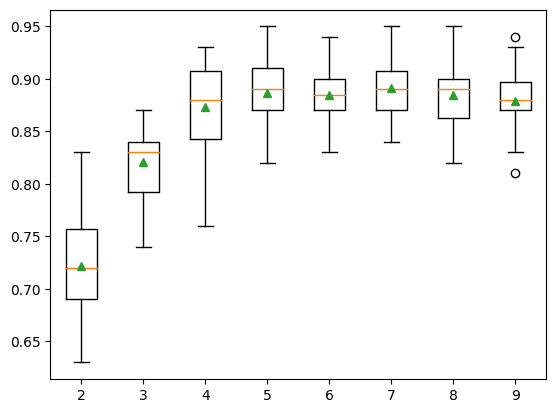

In [ ]:
# Importamos librerías que nos permitan generar el dataset, seleccionar las características y comparar con estadísticas las mejores opciones
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Crea un problema de clasificación binaria aleatorio, con 1000 registros y 10 entradas (5 importantes y 5 redundantes)
def Generar_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y

# Generar diversos modelos variando el número de características entre 2 y 10
# La función Pipeline aplica secuencialmente una lista de transformadas (con fit-transform) y un estimador final
def Generar_modelos():
	modelos = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		modelo = DecisionTreeClassifier()
		modelos[str(i)] = Pipeline(steps=[('sel',rfe),('modelo',modelo)])
	return modelos

# Evaluar un modelo específico con k-fold cross-validation
def Evaluar_modelo(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	puntajes = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return puntajes

# Ejecución del programa
# Generar datasets y modelos
X, y = Generar_dataset()
modelos = Generar_modelos()
# Evaluar los modelos y alamacenar los resultados
resultados, nombres = list(), list()
for nombre, modelo in modelos.items():
	puntajes = Evaluar_modelo(modelo, X, y)
	resultados.append(puntajes)
	nombres.append(nombre)
	print('Con %s - Media: %.3f   Desv.std: %.3f' % (nombre, mean(puntajes), std(puntajes)))
# Comparar gráficamente los desempeños de los modelos
pyplot.boxplot(resultados, labels=nombres, showmeans=True)
pyplot.show()

<B>¿Qué conclusiones puede obtener de los resultados?</B>



### 2.1.2 Seleccionar automáticamente el mejor número de características con RFE
Después de hacer la validación cruzada, se puede seleccionar el número de características que genera la mejor media. Para hacerlo de forma automática se usa la clase RFECV especificando el número de características a validar y el tipo de validación cruzada.

El nuevo código quedaría así:

In [ ]:
# Librerías
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Generar dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# Pipeline con RFECV
rfe = RFECV(estimator=DecisionTreeClassifier())
modelo = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',modelo)])

# Evaluar el modelo con validación cruzada de 3 repeticiones, 10 folds
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
puntuacion = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Mostrar desempeño
print('Exactitud: %.3f (%.3f)' % (mean(puntuacion), std(puntuacion)))

# Mostrar características escogidas
rfe.fit(X,y)
for i in range(X.shape[1]):
  print("Columna: %d, Seleccionada: %s, Rank: %.3f" % (i, rfe.support_[i], rfe.ranking_[i]))

Exactitud: 0.889 (0.027)
Columna: 0, Seleccionada: True, Rank: 1.000
Columna: 1, Seleccionada: False, Rank: 2.000
Columna: 2, Seleccionada: True, Rank: 1.000
Columna: 3, Seleccionada: True, Rank: 1.000
Columna: 4, Seleccionada: True, Rank: 1.000
Columna: 5, Seleccionada: False, Rank: 3.000
Columna: 6, Seleccionada: True, Rank: 1.000
Columna: 7, Seleccionada: True, Rank: 1.000
Columna: 8, Seleccionada: True, Rank: 1.000
Columna: 9, Seleccionada: True, Rank: 1.000


## 2.2 Explorar el desempeño de diversos algoritmos base
RFE es independiente del algoritmo base que envuelve. Cada algoritmo interior selecciona características basado en diversos parámetros, lo que puede generar variaciones en el modelo final.

Una buena práctica consiste en explorar y calificar los diferentes algoritmos buscando el que presente el mejor desempeño.


Con lr:  	Media: 0.885   Desv.std: 0.032
Con per:  	Media: 0.849   Desv.std: 0.038
Con arbol:  	Media: 0.890   Desv.std: 0.029
Con rf:  	Media: 0.854   Desv.std: 0.037
Con gbm:  	Media: 0.886   Desv.std: 0.031



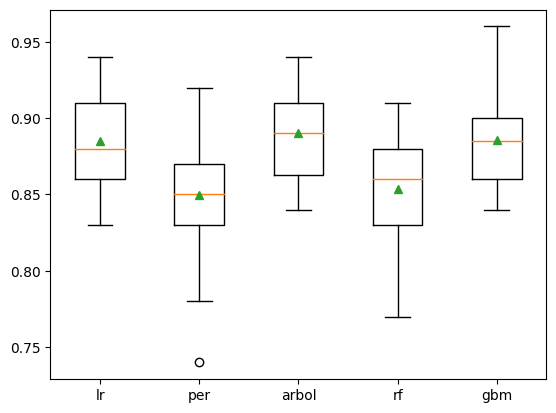

In [ ]:
# Cargamos 5 algoritmos diferentes para compararlos
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Generamos dataset
def Generar_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y

# Generamos la lista de modelos a evaluar
def Generar_modelos():
	modelos = dict()
	# Regresión logística
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	modelo = DecisionTreeClassifier()
	modelos['lr'] = Pipeline(steps=[('s',rfe),('m',modelo)])
	# Perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	modelo = DecisionTreeClassifier()
	modelos['per'] = Pipeline(steps=[('s',rfe),('m',modelo)])
	# Arbol de decisión
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	modelos['arbol'] = Pipeline(steps=[('s',rfe),('m',modelo)])
	# Random Forest
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
	modelo = DecisionTreeClassifier()
	modelos['rf'] = Pipeline(steps=[('s',rfe),('m',modelo)])
	# Gradient Boosting
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
	modelo = DecisionTreeClassifier()
	modelos['gbm'] = Pipeline(steps=[('s',rfe),('m',modelo)])
	return modelos

# Evaluar un modelo dado con validación cruzada
def Evaluar_modelo(modelo, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	puntajes = cross_val_score(modelo, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return puntajes

# Ejecución del programa.
# Generar dataset y modelos
X, y = Generar_dataset()
modelos = Generar_modelos()

# Evaluar modelos y almacenar resultados
resultados, nombres = list(), list()
for nombre, modelo in modelos.items():
  puntajes = Evaluar_modelo(modelo, X, y)
  resultados.append(puntajes)
  nombres.append(nombre)
  print('Con %s:  \tMedia: %.3f   Desv.std: %.3f' % (nombre, mean(puntajes), std(puntajes)))

# Comparar gráficamente los desempeños de los modelos
pyplot.boxplot(resultados, labels=nombres, showmeans=True)
print()
pyplot.show()

<B>¿Qué conclusiones puede obtener de los resultados?

¿Cómo podemos observar que variables fueron escogidas en cada caso y hacer una selección aleatoria del número de variables?</B>